## Imports

In [1]:
!pip install pandas
!pip install statistics
!pip install seaborn
!pip install matplotlib
!pip install sklearn

In [2]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

## Loading dataset 

In [3]:
# Training dataset dataframe
df_train = pd.read_csv('data/train.csv')

# Test dataset dataframe
df_test = pd.read_csv('data/test.csv')

# We drop the unwanted columns from the test set
df_test.drop(columns=['B','S','SS','CONTACT_QUALITY'],inplace=True)
df_train.head()

,UID,PITCHER_KEY,RELEASE_SPEED,SPIN_RATE_ABSOLUTE,RELEASE_HEIGHT,RELEASE_SIDE,PITCH_TYPE_TRACKED_KEY
0,361,483,92.179588,1976.671631,6.226351,-2.788761,SI
1,362,483,93.352028,2113.584229,6.384256,-2.626077,SI
2,350,864,93.109413,2153.424561,5.912424,-1.954881,FB
3,353,928,93.710999,2457.569092,5.913225,-1.000528,FB
4,359,483,92.901886,1993.830200,6.303658,-2.822147,SI


In [4]:
df_test.head()

,UID,PITCHER_KEY,RELEASE_SPEED,SPIN_RATE_ABSOLUTE,RELEASE_HEIGHT,RELEASE_SIDE
0,5854,90004,92.090401,1736.750000,5.11061,-1.971080
1,5790,90004,93.045097,1925.030029,5.21557,-1.830700
2,1407,90000,91.419098,2392.090088,5.74147,1.406280
3,1129,90003,83.420998,2177.780029,5.83022,-1.111150
4,1980,90001,70.362602,2789.729980,7.01691,0.554392


In [5]:
df_train.describe()

,UID,PITCHER_KEY,RELEASE_SPEED,SPIN_RATE_ABSOLUTE,RELEASE_HEIGHT,RELEASE_SIDE
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,612.034350,88.777251,2249.448645,5.867257,-0.706419
std,28867.657797,389.421967,5.989085,325.712020,0.524442,1.887958
min,0.000000,0.000000,65.036499,0.000000,1.036694,-5.262220
25%,24999.750000,285.000000,84.515245,2087.816284,5.618483,-2.073693
50%,49999.500000,564.000000,89.853310,2265.095825,5.907460,-1.423814
75%,74999.250000,915.000000,93.600851,2438.664917,6.193550,1.219448
max,99999.000000,1453.000000,102.899002,3599.944824,7.525885,5.165480


##### Let's check if our dataset contains any null or missing values.

In [6]:
df_train.isnull().sum()

UID                       0
PITCHER_KEY               0
RELEASE_SPEED             0
SPIN_RATE_ABSOLUTE        0
RELEASE_HEIGHT            0
RELEASE_SIDE              0
PITCH_TYPE_TRACKED_KEY    0
dtype: int64

### 

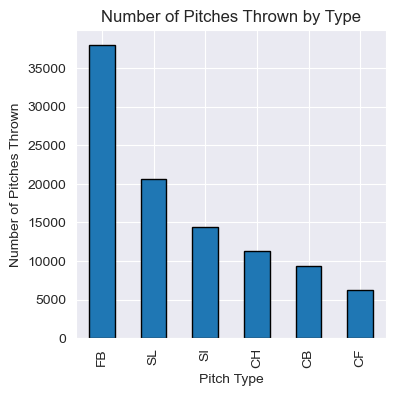

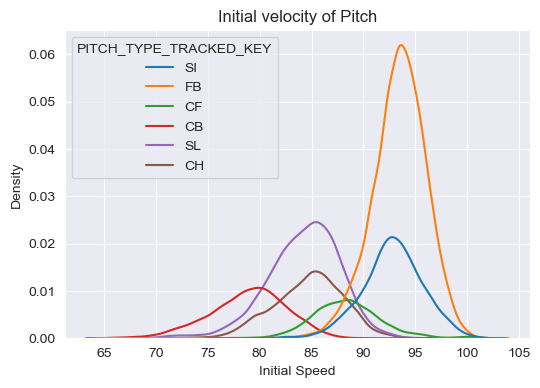

In [7]:
# Set graph style
sns.set_style("darkgrid")

# Graph pitch types
fig = plt.figure(figsize=(4,4))
df_train.PITCH_TYPE_TRACKED_KEY.value_counts().plot(kind="bar", edgecolor="k")
plt.title("Number of Pitches Thrown by Type")
plt.xlabel("Pitch Type")
plt.ylabel("Number of Pitches Thrown")
plt.show()


# Density plot of pitch release speed by pitch type
plt.figure(figsize=(6,4))
sns.kdeplot(x=df_train["RELEASE_SPEED"], hue=df_train["PITCH_TYPE_TRACKED_KEY"])
plt.title("Initial velocity of Pitch")
plt.xlabel("Initial Speed")
plt.show()

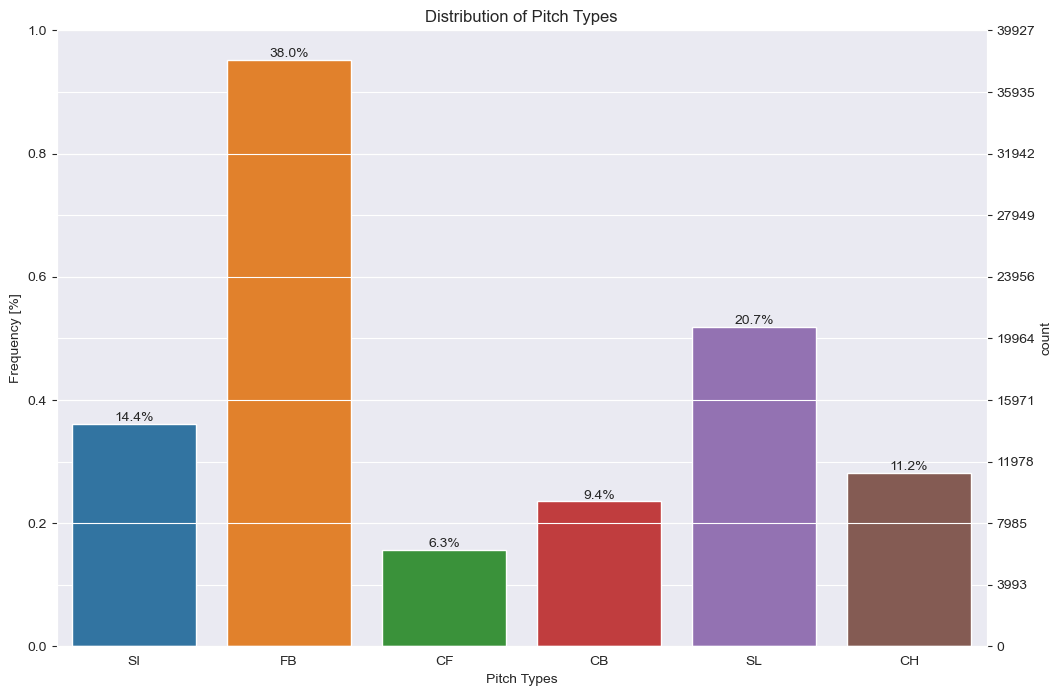

In [8]:
ncount = len(df_train)

plt.figure(figsize=(12,8))
ax = sns.countplot(x="PITCH_TYPE_TRACKED_KEY", data=df_train)
plt.title('Distribution of Pitch Types')
plt.xlabel('Pitch Types')

ax2=ax.twinx()

ax2.yaxis.tick_left()
ax.yaxis.tick_right()

ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
plt.show()

In [9]:
df_train.corr()

,UID,PITCHER_KEY,RELEASE_SPEED,SPIN_RATE_ABSOLUTE,RELEASE_HEIGHT,RELEASE_SIDE
UID,1.000000,0.001522,0.007331,-0.067521,-0.021355,0.016523
PITCHER_KEY,0.001522,1.000000,0.058644,-0.038125,-0.015715,-0.030568
RELEASE_SPEED,0.007331,0.058644,1.000000,-0.035982,0.066649,-0.102135
SPIN_RATE_ABSOLUTE,-0.067521,-0.038125,-0.035982,1.000000,0.015249,-0.106147
RELEASE_HEIGHT,-0.021355,-0.015715,0.066649,0.015249,1.000000,0.114425
RELEASE_SIDE,0.016523,-0.030568,-0.102135,-0.106147,0.114425,1.000000


In [10]:
print("Total no. of pitches thrown for each of the pitch types")
df_train['PITCH_TYPE_TRACKED_KEY'].value_counts()

Total no. of pitches thrown for each of the pitch types


FB    38026
SL    20686
SI    14401
CH    11239
CB     9392
CF     6256
Name: PITCH_TYPE_TRACKED_KEY, dtype: int64

#### Let's store our training dataset into predictor and reesponse variables 

In [11]:
cols = ['RELEASE_SPEED','SPIN_RATE_ABSOLUTE','RELEASE_HEIGHT','RELEASE_SIDE']
X = df_train[cols]
y = df_train['PITCH_TYPE_TRACKED_KEY']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 4)
(80000,)
(20000, 4)
(20000,)


#### Standardization is a very popular and effective approach to dealing with variables that may have different scales.
We need to standardize the columns to have a common scale so that their relationship can be better understood by our model.<br>
The StandardScaler transform allows us to quickly & easily standardize our data columns by first subtracting the column's mean, then dividing by the column's standard deviation.

In [14]:
sc = StandardScaler()
X1 = sc.fit_transform(X_train)
X_train = sc.transform(X_train)

X2 = sc.fit_transform(X_test)
X_test = sc.transform(X_test)

### In this section, we will implement a logistic regression model to predict the probability of each of the pitch types.
Our predictor variables here are: Release speed of the ball, Absolute Spin Rate, Release Height, and Release Side.<br>
Our response variable is obviously the type of pitch thrown.

### Logistic Regression

In [15]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict_proba(X_test)
print('Model accuracy:',lr.score(X_test,y_test)*100,'%')

Model accuracy: 68.895 %


#### Confusion matrix helps us get an understanding of how well the model predicts the responses compared to the actual labels.

In [16]:
def evalreport(X,y,model):
    cfm = confusion_matrix(y,model.predict(X),labels=['CB','CF','CH','FB','SI','SL'])
    cmdf = pd.DataFrame(cfm, index=['CB','CF','CH','FB','SI','SL'], columns=['CB','CF','CH','FB','SI','SL'])
    cfhm = sns.heatmap(cmdf,annot=True,cmap='Blues',fmt='')
    cfhm.set(xlabel='Predicted', ylabel='Actual')
    display(cfhm)
    print(classification_report(y, model.predict(X)))

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

              precision    recall  f1-score   support

          CB       0.78      0.67      0.72      1855
          CF       0.17      0.00      0.01      1276
          CH       0.76      0.76      0.76      2231
          FB       0.69      0.94      0.79      7627
          SI       0.57      0.14      0.23      2924
          SL       0.65      0.80      0.72      4087

    accuracy                           0.69     20000
   macro avg       0.60      0.55      0.54     20000
weighted avg       0.65      0.69      0.64     20000



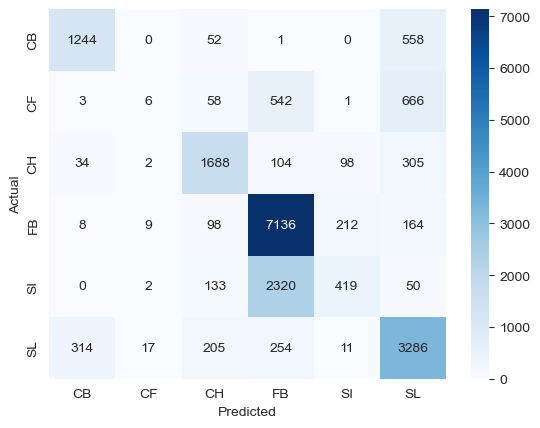

In [17]:
evalreport(X_test,y_test,lr)

Since this is a multiclass classification problem, we will explore the K-Nearest Neighbors (KNN) classifier to evaluate its performance for our dataset too.<br>
Usually when people are confronted with a multiclass classification problem, they mistakenly believe that logistic regression would be the best approach to take, but in fact, this is not true. The problem with logistic regression is that it assumes that each class value has an equal probability of occurring during training. Since this assumption does not hold for multiclass classification problems, it can cause the model to output some very infeasible values. Instead, the KNN classifier allows us to avoid these infeasiblities by identifying the most similar cases and placing more emphasis on their values.<br>
The KNN classifier works by taking the training data and identifying k cases that are closest to the test data point. It then places a voting scheme on these k cases to determine which class value should be selected.


### KNN Classifier

In [18]:
# training a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 12).fit(X_train,y_train)

# accuracy on X_
accuracy = knn.score(X_test, y_test)

# creating a confusion matrix
knn_pred = knn.predict(X_test)

print('Model accuracy:',knn.score(X_test,y_test)*100,'%')

Model accuracy: 74.395 %


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

              precision    recall  f1-score   support

          CB       0.78      0.78      0.78      1855
          CF       0.57      0.41      0.48      1276
          CH       0.81      0.81      0.81      2231
          FB       0.75      0.90      0.82      7627
          SI       0.65      0.38      0.48      2924
          SL       0.75      0.77      0.76      4087

    accuracy                           0.74     20000
   macro avg       0.72      0.67      0.69     20000
weighted avg       0.73      0.74      0.73     20000



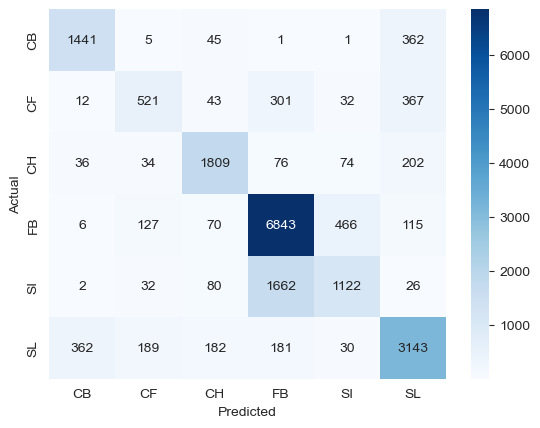

In [19]:
evalreport(X_test,y_test,knn)

### Prediction on Test Data

#### Based on accuracy measures and tradeoff between precision and recall, we pick KNN Classifier to predict the pitch type on our test dataset.

In [20]:
sol = pd.DataFrame(data=df_test['UID'],columns=['UID'])
df_test.drop(columns=['PITCHER_KEY','UID'],inplace=True)
df_test

,RELEASE_SPEED,SPIN_RATE_ABSOLUTE,RELEASE_HEIGHT,RELEASE_SIDE
0,92.090401,1736.750000,5.11061,-1.971080
1,93.045097,1925.030029,5.21557,-1.830700
2,91.419098,2392.090088,5.74147,1.406280
3,83.420998,2177.780029,5.83022,-1.111150
4,70.362602,2789.729980,7.01691,0.554392
...,...,...,...,...
9290,81.672401,2264.669922,5.43464,-1.980910
9291,97.753502,2461.350098,5.93526,-1.199740
9292,92.427902,2132.750000,6.03055,-1.017920
9293,92.045197,2073.979980,5.55516,-1.937830


In [21]:
Xt = sc.fit_transform(df_test)
test = sc.transform(df_test)

pred_cb = []
pred_cf = []
pred_ch = []
pred_fb = []
pred_si = []
pred_sl = []

In [22]:
test_pred = knn.predict_proba(test)

In [23]:
for i in range(len(test_pred)):
    pred_cb.append(test_pred[i][0])
    pred_cf.append(test_pred[i][1])
    pred_ch.append(test_pred[i][2])
    pred_fb.append(test_pred[i][3])
    pred_si.append(test_pred[i][4])
    pred_sl.append(test_pred[i][5])

In [24]:
sol['CB'] = pred_cb
sol['CF'] = pred_cf
sol['CH'] = pred_ch
sol['FB'] = pred_fb
sol['SI'] = pred_si
sol['SL'] = pred_sl

In [25]:
sol.to_csv('data/solution.csv',index=False)